## Data Loading and Preprocessing

In [1]:
# importing required dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

In [2]:
# loading dataset
df = pd.read_json("./problems_data.jsonl", lines=True)
df.head()

,title,description,input_description,output_description,sample_io,problem_class,problem_score,url
0,Uuu,Unununium (Uuu) was the name of the chemical\n...,The input consists of one line with two intege...,The output consists of $M$ lines where the $i$...,"[{'input': '7 10', 'output': '1 2 2 3 1 3 3 4 ...",hard,9.7,https://open.kattis.com/problems/uuu
1,House Building,A number of eccentrics from central New York h...,"The input consists of $10$ test cases, which a...",Print $K$ lines with\n the positions of the...,"[{'input': '0 2 3 2 50 60 50 30 50 40', 'outpu...",hard,9.7,https://open.kattis.com/problems/husbygge
2,Mario or Luigi,Mario and Luigi are playing a game where they ...,,,"[{'input': '', 'output': ''}]",hard,9.6,https://open.kattis.com/problems/marioorluigi
3,The Wire Ghost,Žofka is bending a copper wire. She starts wit...,The first line contains two integers $L$ and $...,The output consists of a single line consistin...,"[{'input': '4 3 3 C 2 C 1 C', 'output': 'GHOST...",hard,9.6,https://open.kattis.com/problems/thewireghost
4,Barking Up The Wrong Tree,"Your dog Spot is let loose in the park. Well, ...",The first line of input consists of two intege...,Write a single line containing the length need...,"[{'input': '2 0 10 0 10 10', 'output': '14.14'...",hard,9.6,https://open.kattis.com/problems/barktree


In [ ]:
df.shape

(4112, 8)

In [71]:
print(df.loc[1, "description"])

number eccentrics central new york decided enough modern society want move together bought rectangular piece land far away settle land consists n times squares possible build maximum one house given square square value x describes nice scale 0 100 goal eccentrics get far away possible everyone else including happiness eccentric experiences building house square x thus x cdot smallest distance another person habit eccentrics use manhattan distance measure defined min x - x 2 + - 2 people squares x 2 2 eccentrics want help placing houses optimally sum happiness experience high possible help


In [72]:
print(df.loc[1, "input_description"])

input consists 10 test cases described


In [74]:
print(df.loc[1, "output_description"])

print k lines positions houses line contain two numbers first row house 1 n column 1 two houses may placed position


2nd row has no input_description and no output_description -> maybe empty strings

In [4]:
# droping url and sample_io columns
df.drop(columns=["url", "sample_io"], inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4112 entries, 0 to 4111
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               4112 non-null   object 
 1   description         4112 non-null   object 
 2   input_description   4112 non-null   object 
 3   output_description  4112 non-null   object 
 4   problem_class       4112 non-null   object 
 5   problem_score       4112 non-null   float64
dtypes: float64(1), object(5)
memory usage: 192.9+ KB


In [6]:
df.isnull().sum()

title                 0
description           0
input_description     0
output_description    0
problem_class         0
problem_score         0
dtype: int64

No None, NaN values in the dataset

In [7]:
# checking for strings having "NA" or "N/A"
df.isin(["N/A", "NA", "n/a", "na", "NAN", "None"]).sum().sum()

0

In [8]:
# checking for empty strings in the dataset
df.isin([""]).sum().sum()

332

In [9]:
# replacing empty strings with "missng info"
text_cols = ["description", "input_description", "output_description"]

for col in text_cols:
    df[col] = df[col].replace("", "missing info")

In [10]:
df.head()

,title,description,input_description,output_description,problem_class,problem_score
0,Uuu,Unununium (Uuu) was the name of the chemical\n...,The input consists of one line with two intege...,The output consists of $M$ lines where the $i$...,hard,9.7
1,House Building,A number of eccentrics from central New York h...,"The input consists of $10$ test cases, which a...",Print $K$ lines with\n the positions of the...,hard,9.7
2,Mario or Luigi,Mario and Luigi are playing a game where they ...,missing info,missing info,hard,9.6
3,The Wire Ghost,Žofka is bending a copper wire. She starts wit...,The first line contains two integers $L$ and $...,The output consists of a single line consistin...,hard,9.6
4,Barking Up The Wrong Tree,"Your dog Spot is let loose in the park. Well, ...",The first line of input consists of two intege...,Write a single line containing the length need...,hard,9.6


In [11]:
# checking for empty strings in the dataset
df.isin([""]).sum().sum()

0

In [12]:
# downloading and importing stopwords
from nltk.corpus import stopwords

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amareswarnagam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# english stopwords
print(stop_words)

{"haven't", 'before', 'again', 've', 'below', 'didn', 'during', "you'll", 'i', 'her', "you'd", 'herself', 'only', 'ain', 'into', "i'm", 'his', 'through', 'mightn', 'most', "that'll", 'which', 'over', 'further', 'an', 'do', 'was', 'who', 'them', "we're", 'don', "shan't", 'so', 'our', "we'd", 'when', "don't", 'wouldn', 'me', 'if', "she's", 'but', 'more', 'just', 'm', 'hasn', 'ourselves', "you're", "won't", 'out', 'yourself', "hasn't", "it's", 'off', 'had', 'their', 'shan', 'there', "they'll", "hadn't", 'been', "you've", 'this', "shouldn't", "isn't", 't', 's', 'some', 'same', 'than', 'haven', 'such', 'those', 'down', 'by', 'what', 'll', "wasn't", 'we', 'doesn', 'o', 'on', 'yourselves', "i've", 'they', 'she', 'my', "didn't", "aren't", "they've", "wouldn't", 'is', "he'll", 'themselves', 'has', 'up', 'from', 'not', "should've", 'doing', 'am', 'in', 'ma', 'very', 'any', "mightn't", 'as', "he's", 'does', 'theirs', 'between', 'until', 'couldn', 'under', 'with', "he'd", 'of', 're', 'won', "needn

In [ ]:
# function for cleaning text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s+*/=<>-]", " ", text)
    text = re.sub(r"\s+", " ", text)$
    tokens = [word for word in text.split() if word not in stop_words]
    return " ".join(tokens)

In [15]:
# cleaning all text columns
cols = ["title", "description", "input_description", "output_description"]
for col in cols:
    df[col] = df[col].apply(clean_text)

In [16]:
# combining all text columns
df["text"] = (
    df["title"] + " " + df["description"] + " " + 
    df["input_description"] + " " + df["output_description"]
)

In [17]:
df["text"].iloc[0]

'uuu unununium uuu name chemical element atom number 111 changed r ntgenium rg 2004 heavy elements unstable synthesized laboratories hired one labs optimize algorithms used simulations example simulating complicated chemical reactions important keep track many particles done counting connected components graph currently lab python code see attachments takes undirected graph outputs number connected components see code based everyone favourite data structure union-find1 looking code notice actually bug code still gives correct answers bug could cause run inefficiently task construct graph given number vertices edges code runs slowly count many times third line one inside loop visited program get score according number input consists one line two integers n number vertices edges graph apart sample one test case n = 100 = 500 output consists lines th contains two integers u v 1 leq u v leq n indicates vertices u v connected edge graph'

In [18]:
df.head()

,title,description,input_description,output_description,problem_class,problem_score,text
0,uuu,unununium uuu name chemical element atom numbe...,input consists one line two integers n number ...,output consists lines th contains two integers...,hard,9.7,uuu unununium uuu name chemical element atom n...
1,house building,number eccentrics central new york decided eno...,input consists 10 test cases described,print k lines positions houses line contain tw...,hard,9.7,house building number eccentrics central new y...
2,mario luigi,mario luigi playing game pick distinct numbers...,missing info,missing info,hard,9.6,mario luigi mario luigi playing game pick dist...
3,wire ghost,ofka bending copper wire starts straight wire ...,first line contains two integers l n l length ...,output consists single line consisting string ...,hard,9.6,wire ghost ofka bending copper wire starts str...
4,barking wrong tree,dog spot let loose park well relatively loose ...,first line input consists two integers n 1 le ...,write single line containing length needed lea...,hard,9.6,barking wrong tree dog spot let loose park wel...


In [ ]:
from wordcloud import WordCloud
# function for printing wordclouds
def plot_wordcloud(text, title):
    wc = WordCloud(
        width=500, height=500, min_font_size=12, background_color="white"
    ).generate(text)
    plt.figure(figsize=(15, 6))
    plt.imshow(wc.to_image(), interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.show()

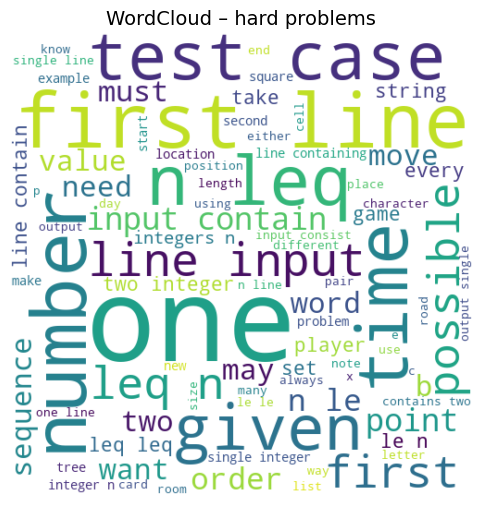

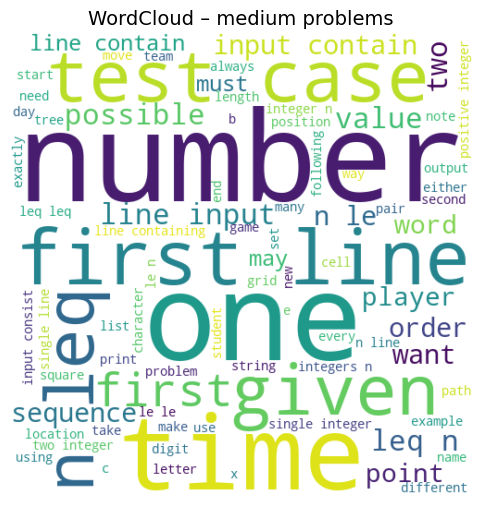

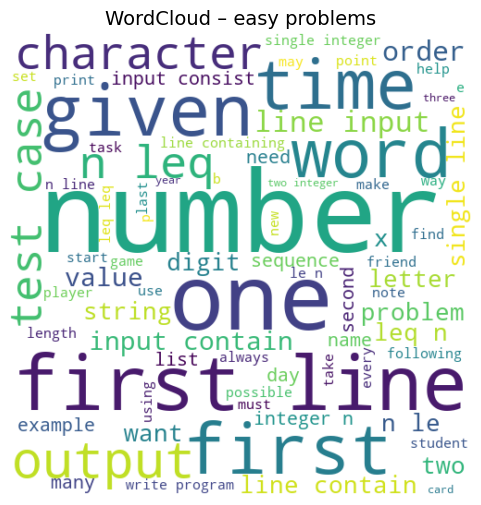

In [ ]:
# printing wordcloud for each class in problem_class column
for difficulty in df["problem_class"].unique():
    class_text = " ".join(df[df["problem_class"] == difficulty]["text"])
    plot_wordcloud(class_text, f"WordCloud – {difficulty} problems")

## Feature Engineering

In [ ]:
keywords = [
    "graph", "tree", "dp", "dynamic programming",
    "recursion", "greedy", "binary search",
    "sorting", "heap", "stack", "queue"
]

# finding number of keywords
def keyword_features(text):
    return sum(text.count(k) for k in keywords)

In [ ]:
# structural features
def structural_features(text):
    return [
        len(text.split()),  # text length
        len(re.findall(r"[+\-*/=<>]", text)),  # math symbols
        text.count("if"),  # conditional hints
        text.count("for") + text.count("while"),  # loop hints
    ]

In [23]:
engineered_features = []

for text in df["text"]:
    features = []
    features.append(keyword_features(text))      # keyword column
    features.extend(structural_features(text))   # structural feature columns
    engineered_features.append(features)

engineered_features = np.array(engineered_features)
engineered_features_df = pd.DataFrame(
    engineered_features,
    columns=[
        "keyword_count",
        "text_length",
        "math_symbol_count",
        "if_count",
        "loop_count",
    ]
)


In [24]:
engineered_features_df.shape

(4112, 5)

In [25]:
engineered_features_df.sample(7)

,keyword_count,text_length,math_symbol_count,if_count,loop_count
1658,0,92,4,0,0
2489,3,180,7,0,0
3350,0,47,1,0,0
2831,0,162,11,1,0
1709,0,197,1,0,0
3470,0,66,4,0,1
965,4,153,1,0,0


## Data Visualisation

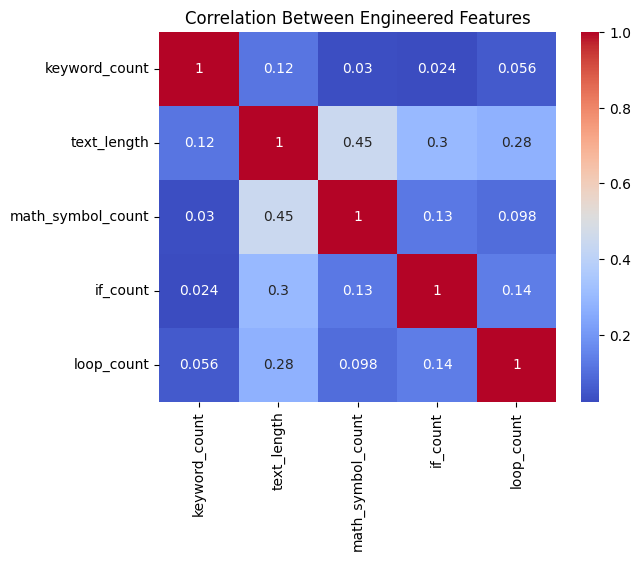

In [26]:
# correlation between engineered features
sns.heatmap(
    engineered_features_df.corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Between Engineered Features")
plt.show()

**There is no strong correlation between the columns in engineered_features_df but all of them show a weak positive relationship with each other.**

<Axes: xlabel='problem_class', ylabel='count'>

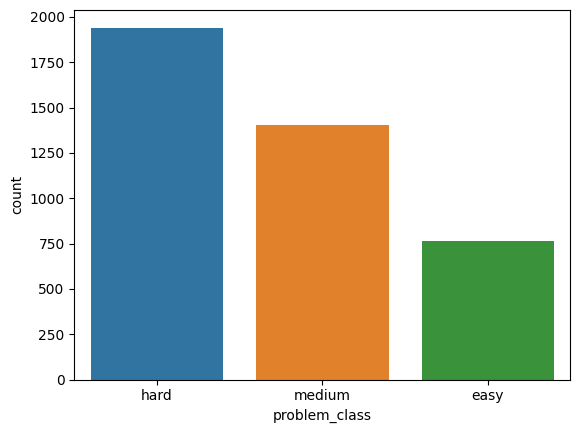

In [27]:
# barplot to know the number of labels in problem_class column
sns.countplot(data=df, x="problem_class", hue="problem_class")

**Data is imbalanced**

In [28]:
# combining engineered_features with problem class
plot_df = engineered_features_df.copy()
plot_df["problem_class"] = df["problem_class"]

In [29]:
plot_df["text_length"].groupby(df["problem_class"]).describe()

,count,mean,std,min,25%,50%,75%,max
problem_class,,,,,,,,
easy,766.0,121.981723,56.877644,7.0,82.25,114.5,152.0,414.0
hard,1941.0,164.486347,70.413656,25.0,116.00,156.0,199.0,606.0
medium,1405.0,151.750890,68.638711,18.0,106.00,140.0,184.0,662.0


**Mean and Standarad deviation of text length is higher for more difficult class**

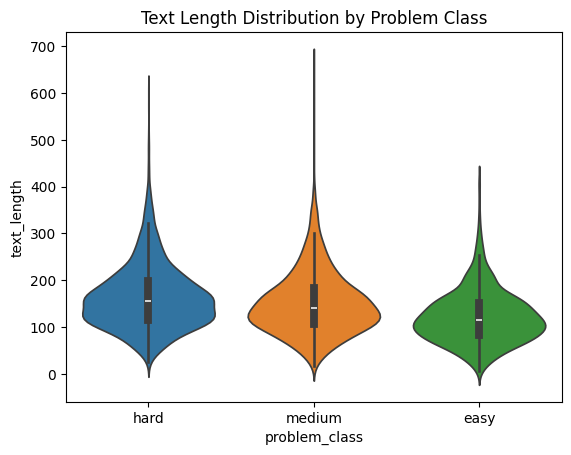

In [ ]:
# text length distriubtion for each class
sns.violinplot(
    data=plot_df,
    x="problem_class",
    y="text_length",
    hue="problem_class"
)
plt.title("Text Length Distribution by Problem Class")
plt.show()

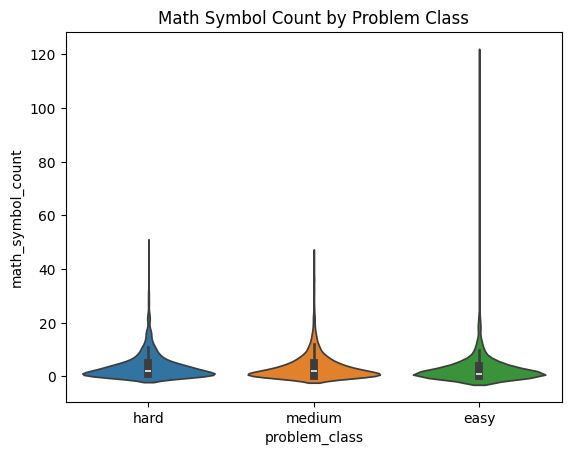

In [31]:
sns.violinplot(
    data=plot_df,
    x="problem_class",
    y="math_symbol_count",
    hue="problem_class"
)
plt.title("Math Symbol Count by Problem Class")
plt.show()

Math symbol count is low(or zero) for most problems

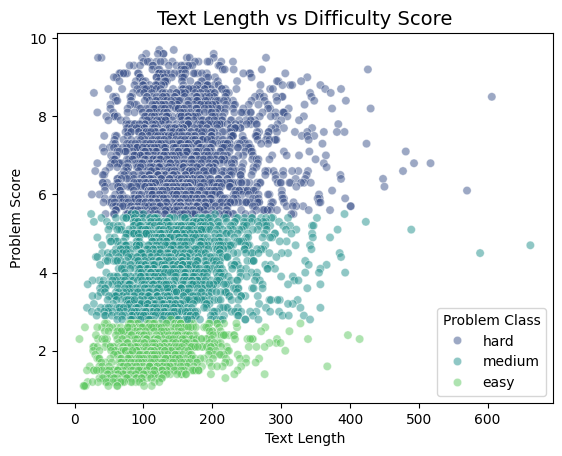

In [ ]:
sns.scatterplot(
    x=engineered_features_df["text_length"],
    y=df["problem_score"],
    hue=df["problem_class"],
    palette="viridis",
    alpha=0.5
)

plt.title("Text Length vs Difficulty Score", fontsize=14)
plt.xlabel("Text Length")
plt.ylabel("Problem Score")
plt.legend(title="Problem Class")
plt.show()


## Feature Extraction

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import accuracy_score, root_mean_squared_error, confusion_matrix

In [34]:
vec = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))

In [35]:
X_vector = vec.fit_transform(df["text"])

In [36]:
type(X_vector)

scipy.sparse._csr.csr_matrix

In [37]:
X_vector.shape

(4112, 1000)

In [38]:
type(X_vector.toarray())

numpy.ndarray

In [39]:
# combining vectors and engineered features
X = np.hstack([X_vector.toarray(), engineered_features_df])

In [40]:
y_class = df["problem_class"]
y_score = df["problem_score"]

## Model Selection and Training

### **Classification**

In [41]:
# list of classifiers
classifiers = [LogisticRegression(max_iter=10000, class_weight="balanced"), LinearSVC(class_weight="balanced", C=0.01), 
          RandomForestClassifier(), ComplementNB(norm=True)]

In [42]:
# comparing different models using cross validation score and finding the best model which fits the data well
def compare_classifiers_using_cross_validation(models):
  for model in models:
    cv_score = cross_val_score(model, X, y_class, cv=5)
    mean_accuracy_percentage = np.mean(cv_score)*100
    mean_accuracy_percentage = round(mean_accuracy_percentage, 2)
    print("Cross validation accuracies for",model,"=", cv_score)
    print("Accuracy score of the", model, "=", mean_accuracy_percentage, "%")
    print("---------------------------------------------------------------------")

In [43]:
compare_classifiers_using_cross_validation(classifiers)

Cross validation accuracies for LogisticRegression(class_weight='balanced', max_iter=10000) = [0.47144593 0.43742406 0.44647202 0.44768856 0.4756691 ]
Accuracy score of the LogisticRegression(class_weight='balanced', max_iter=10000) = 45.57 %
---------------------------------------------------------------------
Cross validation accuracies for LinearSVC(C=0.01, class_weight='balanced') = [0.49331713 0.47509113 0.45863747 0.48418491 0.5243309 ]
Accuracy score of the LinearSVC(C=0.01, class_weight='balanced') = 48.71 %
---------------------------------------------------------------------
Cross validation accuracies for RandomForestClassifier() = [0.47752126 0.5054678  0.48296837 0.52311436 0.51581509]
Accuracy score of the RandomForestClassifier() = 50.1 %
---------------------------------------------------------------------
Cross validation accuracies for ComplementNB(norm=True) = [0.48481166 0.47873633 0.47445255 0.48905109 0.52068127]
Accuracy score of the ComplementNB(norm=True) = 48.

from above result **RandomClassifier is best performing model**

**Model Training**

In [44]:
X_train, X_test, y_class_train, y_class_test, y_score_train, y_score_test = train_test_split(
    X, y_class, y_score, test_size=0.2, random_state=42
)

**LinearSVC**

In [45]:
# training LinearSVC classifier
svc_classifier = LinearSVC(C=0.01, class_weight="balanced", max_iter=1000)
svc_classifier.fit(X_train, y_class_train)

,"penalty penalty: {'l1', 'l2'}, default='l2'Specifies the norm used in the penalization. The 'l2'penalty is the standard used in SVC. The 'l1' leads to ``coef_``vectors that are sparse.",'l2'
,"loss loss: {'hinge', 'squared_hinge'}, default='squared_hinge'Specifies the loss function. 'hinge' is the standard SVM loss(used e.g. by the SVC class) while 'squared_hinge' is thesquare of the hinge loss. The combination of ``penalty='l1'``and ``loss='hinge'`` is not supported.",'squared_hinge'
,"dual dual: ""auto"" or bool, default=""auto""Select the algorithm to either solve the dual or primaloptimization problem. Prefer dual=False when n_samples > n_features.`dual=""auto""` will choose the value of the parameter automatically,based on the values of `n_samples`, `n_features`, `loss`, `multi_class`and `penalty`. If `n_samples` < `n_features` and optimizer supportschosen `loss`, `multi_class` and `penalty`, then dual will be set to True,otherwise it will be set to False... versionchanged:: 1.3 The `""auto""` option is added in version 1.3 and will be the default in version 1.5.",'auto'
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.For an intuitive visualization of the effects of scalingthe regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",0.01
,"multi_class multi_class: {'ovr', 'crammer_singer'}, default='ovr'Determines the multi-class strategy if `y` contains more thantwo classes.``""ovr""`` trains n_classes one-vs-rest classifiers, while``""crammer_singer""`` optimizes a joint objective over all classes.While `crammer_singer` is interesting from a theoretical perspectiveas it is consistent, it is seldom used in practice as it rarely leadsto better accuracy and is more expensive to compute.If ``""crammer_singer""`` is chosen, the options loss, penalty and dualwill be ignored.",'ovr'
,"fit_intercept fit_intercept: bool, default=TrueWhether or not to fit an intercept. If set to True, the feature vectoris extended to include an intercept term: `[x_1, ..., x_n, 1]`, where1 corresponds to the intercept. If set to False, no intercept will beused in calculations (i.e. data is expected to be already centered).",True
,"intercept_scaling intercept_scaling: float, default=1.0When `fit_intercept` is True, the instance vector x becomes ``[x_1,..., x_n, intercept_scaling]``, i.e. a ""synthetic"" feature with aconstant value equal to `intercept_scaling` is appended to the instancevector. The intercept becomes intercept_scaling * synthetic featureweight. Note that liblinear internally penalizes the intercept,treating it like any other term in the feature vector. To reduce theimpact of the regularization on the intercept, the `intercept_scaling`parameter can be set to a value greater than 1; the higher the value of`intercept_scaling`, the lower the impact of regularization on it.Then, the weights become `[w_x_1, ..., w_x_n,w_intercept*intercept_scaling]`, where `w_x_1, ..., w_x_n` representthe feature weights and the intercept weight is scaled by`intercept_scaling`. This scaling allows the intercept term to have adifferent regularization behavior compared to the other features.",1
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to ``class_weight[i]*C`` forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",'balanced'
,"verbose verbose: int, default=0Enable verbose output. Note that this setting takes advantage of aper-process runtime setting in liblinear that, if enabled, may not workproperly in a multithreaded context.",0
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseu

In [46]:
# Evaluating LinearSVC classifier
print("Test Accuracy:", accuracy_score(y_class_test, svc_classifier.predict(X_test)))
print("Train Accuracy:", accuracy_score(y_class_train,svc_classifier.predict(X_train)))
print("Confusion Matrix:\n", confusion_matrix(y_class_test,  svc_classifier.predict(X_test)))

Test Accuracy: 0.5224787363304981
Train Accuracy: 0.5393736698084525
Confusion Matrix:
 [[ 81  40  15]
 [ 73 314  38]
 [ 58 169  35]]


Model is Underfitting in case of LinearSVC

**RandomForestClassifier**

In [47]:
# trainging Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=150, random_state=42)
rf_classifier.fit(X_train, y_class_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",150
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [48]:
# evaluating Random Forest Classifier
print("Test Accuracy:", accuracy_score(y_class_test, rf_classifier.predict(X_test)))
print("Train Accuracy:", accuracy_score(y_class_train, rf_classifier.predict(X_train)))
print("Confusion Matrix:\n", confusion_matrix(y_class_test, rf_classifier.predict(X_test)))

Test Accuracy: 0.5407047387606319
Train Accuracy: 1.0
Confusion Matrix:
 [[ 29  67  40]
 [ 10 357  58]
 [ 15 188  59]]


Model is Overfitting in case of RandomForestClassifier

**we consider RandomForestClassifier because it gives highest accuracy on unseen data**

### Regression

In [49]:
# list of regressors
regressors = [LinearRegression(), Lasso(), 
              RandomForestRegressor(n_estimators=100, random_state=42), GradientBoostingRegressor(n_estimators=100, random_state=42)]

In [ ]:
# comparing different models using cross validation score and finding the best model which fits the data well
def compare_regressors_using_cross_validation(models):
  results = []
  for model in models:
    cv_score = cross_val_score(model, X, y_score, cv=5, scoring="neg_root_mean_squared_error")
    mean_rmse = np.mean(cv_score)
    mean_rmse = np.abs(round(mean_rmse, 2))
    print("Negative RMSE for",model,"=", cv_score)
    print("RMSE score of the", model, "=", mean_rmse)
    print("---------------------------------------------------------------------")

In [53]:
compare_regressors_using_cross_validation(regressors)

Negative RMSE for LinearRegression() = [-3.55782921 -2.15748968 -1.77341392 -2.39496093 -3.60878463]
RMSE score of the LinearRegression() = 2.7
---------------------------------------------------------------------
Negative RMSE for Lasso() = [-3.70439601 -1.81069789 -0.75850461 -1.85010125 -3.79140434]
RMSE score of the Lasso() = 2.38
---------------------------------------------------------------------
Negative RMSE for RandomForestRegressor(random_state=42) = [-3.58153885 -1.74683542 -0.89186923 -1.93309819 -3.62015624]
RMSE score of the RandomForestRegressor(random_state=42) = 2.35
---------------------------------------------------------------------
Negative RMSE for GradientBoostingRegressor(random_state=42) = [-3.57886857 -1.73833525 -0.88099714 -1.91757881 -3.70307754]
RMSE score of the GradientBoostingRegressor(random_state=42) = 2.36
---------------------------------------------------------------------


**Least error for Random Forest Classifier**

In [61]:
# training and evaluating RandomForestRegressor
# not much change in RMSE on test data on changing the n_estimators[80, 100, 120, 150, 300]
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_score_train)
print("RMSE:", root_mean_squared_error(y_score_test, rf_regressor.predict(X_test)))
print("RMSE:", root_mean_squared_error(y_score_train, rf_regressor.predict(X_train)))

RMSE: 2.027467969401781
RMSE: 0.7604243562518415


## Exporting Best Models

* rf_classifier to predict problem_class
* rf_regressor to predict problem_score

In [64]:
import joblib

In [65]:
# exporting vectorizer
joblib.dump(vec, "tfidf_vectorizer.joblib")

['tfidf_vectorizer.joblib']

In [66]:
# exporting classifier
joblib.dump(rf_classifier, "classifier.joblib")

['classifier.joblib']

In [67]:
# exporting regressor
joblib.dump(rf_regressor, "regressor.joblib")

['regressor.joblib']